In [45]:
# for data wrangling
import pandas as pd
import numpy as np

# Visualize Data
import seaborn as sns
import matplotlib.pyplot as plt

# Model, predict, and solve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Spaceship EDA
This file contains explotory data analysis, wrangling, modeling and prediction

# Describing Data

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train_y = train.Transported
train_X  =train.drop('Transported', axis = 1)

In [7]:
train.shape

(8693, 14)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


**Observations**
* All the numerical variates have missing Values
* The numerical variates are mostly luxury services

In [10]:
train.describe(include='O')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


**Observations**
* Except for passengerId, all variates have missing values
* CryoSleep, VIP should have taken boolean type values, but they are actually strings (mistake)

In [11]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [98]:
train_y.describe()

count     8693
unique       2
top       True
freq      4378
Name: Transported, dtype: object

**Observations**
* Names don't have titles
* Need to pay attention to PassengerId as it is composite. It takes the form of gggg_pp, gggg means the group one is travelling with, dd means the number within that group.

## Analyzing by Pivoting Features

In [12]:
# Convert str to boolean
# train.Transported = train.Transported.map({'True':1, 'False':0})
# train.Transported.head()

In [13]:
# Group transported rates by Homeplanet
train.groupby('HomePlanet').Transported.mean()

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: float64

In [14]:
train.groupby('HomePlanet').Transported.size()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: Transported, dtype: int64

* Transported rate rank: Europa > Mars > Earth

In [15]:
train.groupby('Destination').Transported.size()

Destination
55 Cancri e      1800
PSO J318.5-22     796
TRAPPIST-1e      5915
Name: Transported, dtype: int64

In [16]:
train.groupby('CryoSleep').Transported.mean()

CryoSleep
False    0.328921
True     0.817583
Name: Transported, dtype: float64

* CryoSleep have much higher transported rates

In [17]:
train.groupby('Destination').Transported.mean()

Destination
55 Cancri e      0.610000
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Name: Transported, dtype: float64

* 55 Cancri e > PSO J318.5-22 > TRAPPIST-1e

In [18]:
train.groupby('VIP').Transported.mean()

VIP
False    0.506332
True     0.381910
Name: Transported, dtype: float64

* Non VIP > VIP

**Assumptions based on Data Analysis**
*Correlating*
* What is the age distribution in transported and untransported group?
* What is the age distribution relative to HomePlanet, VIP, faceted by Transport?
* What is the age distribution relative to Destunation, VIP, faceted by Transport?
* How does CryoSleep and VIP affect transported rates?
* How does CryoSleep and Homeplanet affect transported rates?

* How transported rates differ by luxury spending?
* How does spending on luxury services differ by transportation and and destination?
* How does spending on luxury services differ by transportation and and Homeplanet?
* How does spending on luxury services differ by transportation and and deck and siode?

* How do transported rates differ by last names?
* How do transported rates differ by travel groups?


*Completing*
* Fill NA in columns except PassengerId.



*Correcting*

*Creating*
* Combine luxury serivice expense
* Extract group number from passenger Id
* Extract deck, num, side from cabin number
* Extract last names from passenger names

* Banding Age
* Banding luxury amenities
* 

*Classifying*
* Children have higher transportation rates
* Cryosleep means higher transportaion risk
* VIP means lower transporation risk
* Larger spending on luxury services means lowered transported chance
* Group by HomePlanet, CryoSleep, 

# Analysis by Visualization

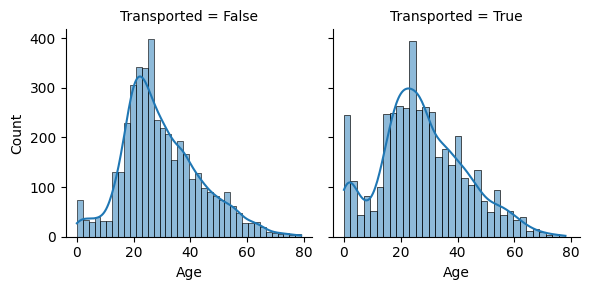

In [99]:
# What is the age distribution in transported and untransported group?
g = sns.FacetGrid(train, col="Transported")
g.map(sns.histplot, "Age", kde = True)
plt.show()

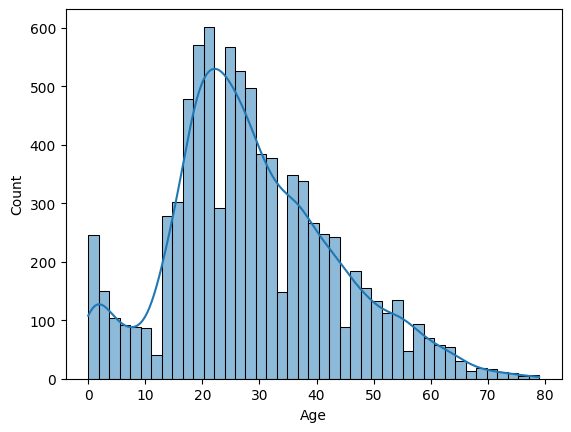

In [100]:
Age = train['Age']
sns.histplot(Age, kde = True)
plt.show()

**Observations**:
* Age distributions are similar in both transported and untransported groups
* The mode is around 20 years old of age
* Both plots are right skewed
* Large number of children under 4 years old are transported
* Youths (15 to 24 years old) are systematically more frequent than adults and seniors

**Decision**
* Add column to indicate whether a child is under 4. Transportation rate might differ by adults versus chidlren. After that, age might not correlate with transported rate.

C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


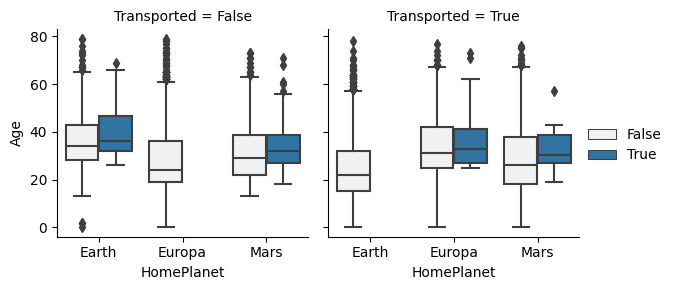

In [21]:
# What is the age distribution relative to HomePlanet, VIP, faceted by Transport?
Grid = sns.FacetGrid(train, col = 'Transported')
Grid.map(sns.boxplot, 'HomePlanet', 'Age', 'VIP')
Grid.add_legend()
plt.show()

**Obsevations**:
* All VIP passengers from Europa are transported to the adternate dimension
* All VIP passengers from Earth are not transported
* Age distribution across groups are similar

**Decision**
* VIP and HomePlanet have interaction: VIP*Europa are transported, VIP*Earth are not transported
* Set two more columns: VIP*Europa and VIP*Earth

C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


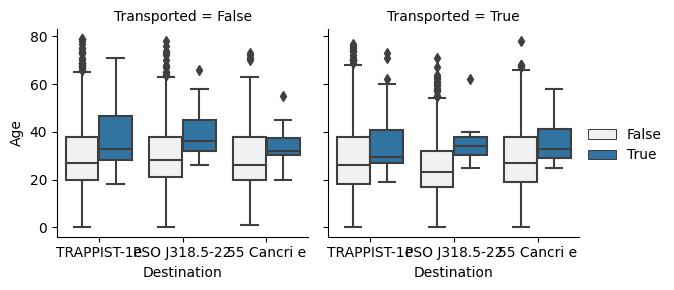

In [22]:
# What is the age distribution relative to Destination, VIP, faceted by Transport?
Grid = sns.FacetGrid(train, col = 'Transported')
Grid.map(sns.boxplot, 'Destination', 'Age', 'VIP')
Grid.add_legend()
plt.show()

C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


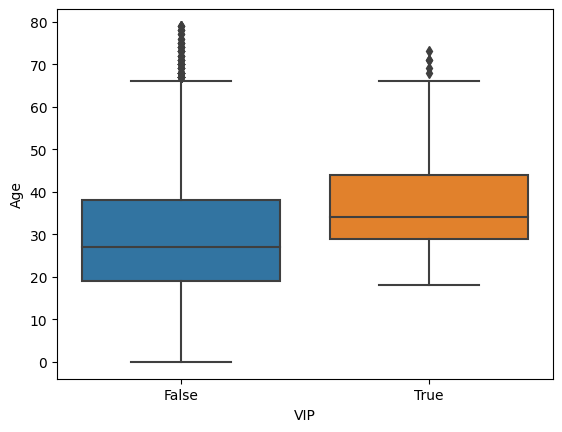

In [23]:
sns.boxplot(train.VIP, train.Age)
plt.show()

**Observations**
* VIPs are older than non-VIP passengers
* VIPs have less age variability than non-VIP passengers

**Decisions**:
* Set Age band and compare transportation rates across age bands

C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


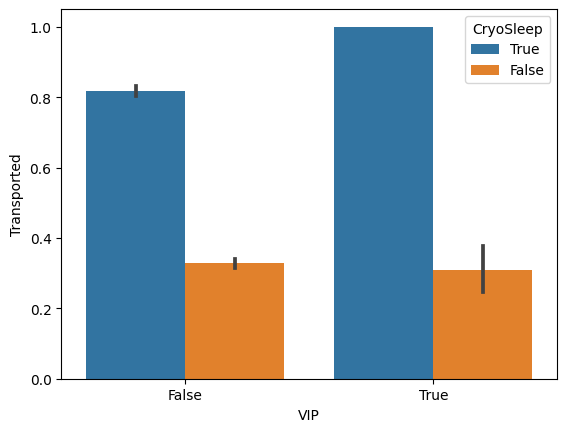

In [24]:
# How does CryoSleep and VIP affect transported rates?
sns.barplot(train.VIP, train.Transported, hue = train.CryoSleep, hue_order = [True, False])
plt.show()

**Observations**
* In both VIP groups, CryoSleep passenger have high rates of transportation

**Decision**
* Take CryoSleep into consideration

C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


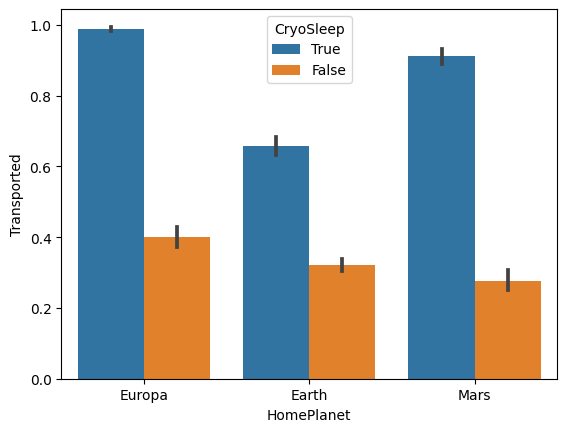

In [25]:
# How does CryoSleep and Homeplanet affect transported rates?
sns.barplot(train.HomePlanet, train.Transported, hue = train.CryoSleep, hue_order = [True, False])
plt.show()

C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: Fu

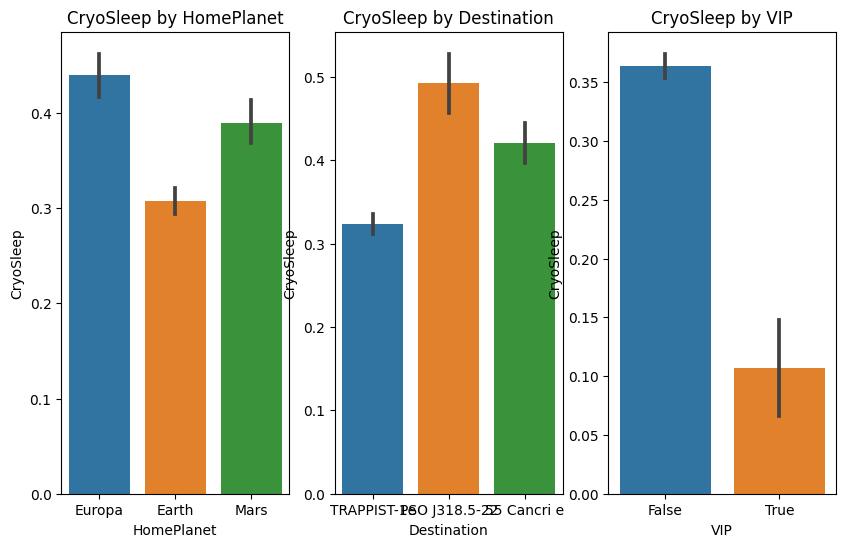

In [26]:
## Explore CryoSleep correation with HomePlanet and Destination 
fig, ax = plt.subplots(1, 3, figsize = (10,6))
sns.barplot(train.HomePlanet, train.CryoSleep, ax = ax[0])
ax[0].set_title("CryoSleep by HomePlanet")
sns.barplot(train.Destination, train.CryoSleep, ax = ax[1])
ax[1].set_title("CryoSleep by Destination")
sns.barplot(train.VIP, train.CryoSleep, ax = ax[2])
ax[2].set_title("CryoSleep by VIP")
plt.show()

**Observations**
* Passengers from Europa tend to CryoSleep, Passengers to PSO tend to sleep
* Recall transported rates ranking with homeplanet: Europa > Earth > Mars, the patterns fits the Cryosleep rates
* Recall transported rates ranking with destination: 55 Cancri e > PSO J318.5-22 > TRAPPIST-1e, sleep rate pattern  PARTIALLY fits this ranking
* Non-VIP passengers tend to sleep, small portion of VIP passengers sleep.

* There is a correlation between CryoSleep rate with HomePlanet, 
* HomePlanet and VIP are clues to whether a passenger hybernates, and Cyrosleep correlates with transportation; the two factors may provide extra hints to transportation

In [27]:
# * How transported rates differ by luxury spending?
luxury_spending = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis = 1)
luxury_spending.shape

(8693,)

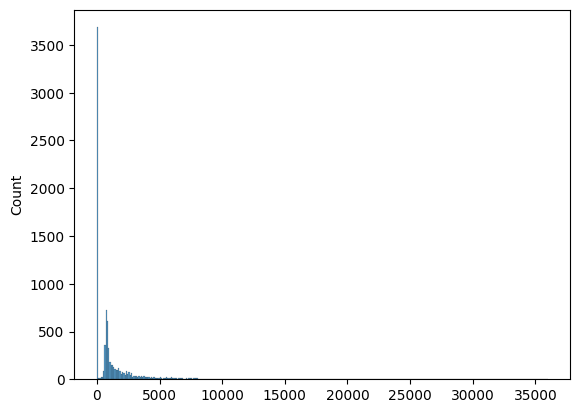

In [103]:
sns.histplot(luxury_spending, binwidth=500)
plt.show()

In [29]:
luxury_banding = pd.cut(luxury_spending, bins = luxury_spending.quantile([0, 0.5, 0.9, 1]), include_lowest = True)
luxury_banding.unique()

[(-0.001, 716.0], (716.0, 3838.4], (3838.4, 35987.0]]
Categories (3, interval[float64, right]): [(-0.001, 716.0] < (716.0, 3838.4] < (3838.4, 35987.0]]

C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


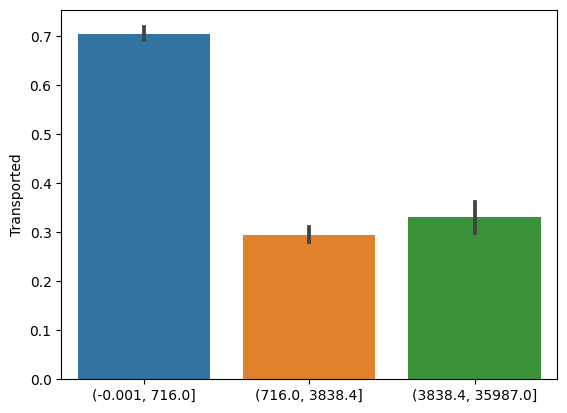

In [30]:
# * How does spending on luxury services differ by transportation and and destination?
sns.barplot(luxury_banding, train.Transported)
plt.show()

C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


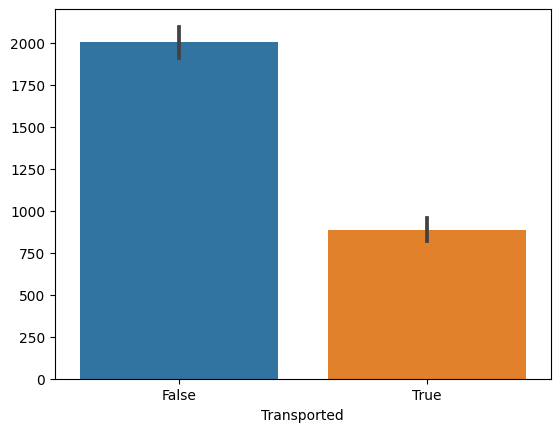

In [31]:
from statistics import median


sns.barplot(train.Transported, luxury_spending)
plt.show()

**Observations**
* Higher fees are associated with lower chance of transportation

C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


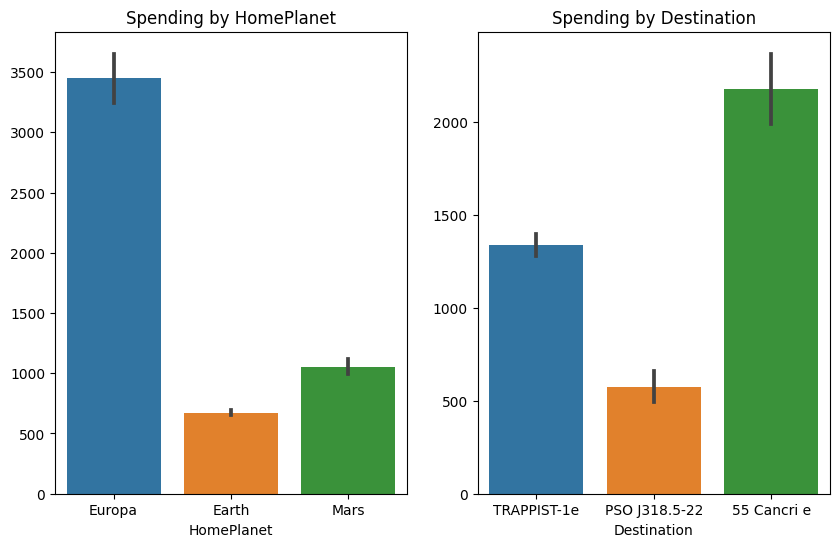

In [32]:
# * How does spending on luxury services differ by transportation and and Homeplanet?
fig, ax = plt.subplots(1, 2, figsize = (10,6))
sns.barplot(train.HomePlanet, luxury_spending, ax = ax[0])
ax[0].set_title("Spending by HomePlanet")
sns.barplot(train.Destination, luxury_spending, ax = ax[1])
ax[1].set_title("Spending by Destination")
plt.show()

C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


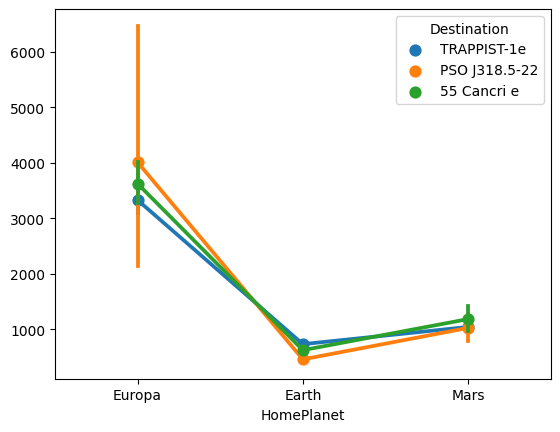

In [33]:
# Grid = sns.FacetGrid(train, col = 'HomePlanet')
# Grid.map(sns.pointplot, '')

sns.pointplot(train.HomePlanet, luxury_spending, hue=train.Destination)
plt.show()

**Observations**
* Europa has the highest average spending, earth has the lowest. Correlation between home planet and spending is observed
* Spending difference among destinations are small

In [34]:
# * How does spending on luxury services differ by transportation and and deck and side?
CabinSplitSeries = train.Cabin.str.split(pat = '/')
CabinSplitFrame = pd.DataFrame(CabinSplitSeries.to_dict())
CabinSplitFrame = CabinSplitFrame.transpose()
CabinSplitFrame = CabinSplitFrame.rename(columns = {0:'Deck', 1:'Num', 2:'Side'})
CabinSplitFrame.head()

,Deck,Num,Side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S


In [35]:
CabinSplitFrame.describe()

,Deck,Num,Side
count,8494,8494,8494
unique,8,1817,2
top,F,82,S
freq,2794,28,4288


In [61]:
spending_by_deck = luxury_spending.groupby(CabinSplitFrame.Deck).mean().sort_values(ascending = False)
spending_by_deck_side = luxury_spending.groupby([CabinSplitFrame.Deck, CabinSplitFrame.Side]).mean().sort_values(ascending = False)
spending_by_deck_side = luxury_spending.groupby([CabinSplitFrame.Deck, CabinSplitFrame.Side]).mean().sort_values(ascending = False)
spending_by_deck_side = spending_by_deck_side.to_frame()
sp_by_deck_side = spending_by_deck_side.reset_index().rename({0:'Spending'}, axis = 1)

fig, ax = plt.subplots(nrow = 1, ncol = 2, figsize = (10, 3))
sns.barplot(spending_by_deck.index, spending_by_deck.values, ax = ax[0])
# ax[0].set_title('Spending by Deck')
sns.barplot(CabinSplitFrame.Side, luxury_spending, ax = ax[1]
# ax[1].set_title('Spending by Side')
# fig.show()

SyntaxError: unexpected EOF while parsing (3343461134.py, line 12)

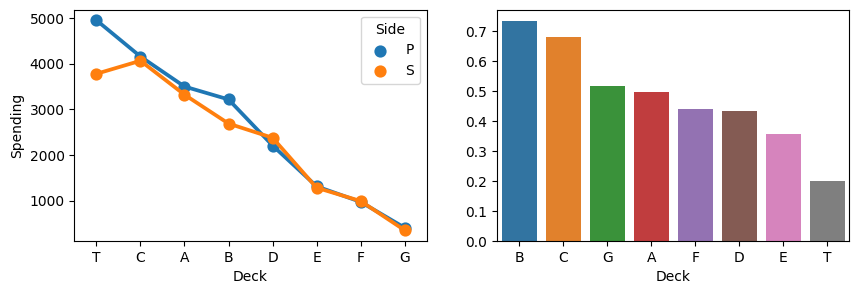

In [66]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 3))
sns.pointplot(x= sp_by_deck_side.Deck, y = sp_by_deck_side.Spending, hue = sp_by_deck_side.Side, ax = ax[0])
ax[0].set_title("Spending by Decks")
trans_by_deck = train.groupby(CabinSplitFrame.Deck).Transported.mean().sort_values(ascending = False)
sns.barplot(x= trans_by_deck.index, y = trans_by_deck.values, ax = ax[1])
ax[1].set_title("Transported by Decks")
plt.show()

**Observations**
* There are systematic differences in spending between decks
* There is a little difference in amenity spending between sides on the same deck
* Transported rates varies across decks, but the ranking pattern largely differ from spending by decks


In [75]:
# * How do transported rates differ by last name
LastName = train.Name.str.extract(r'(\w+)$', expand = False)
LastName_stat = LastName.value_counts()
LastName_stat 

Casonston     18
Oneiles       16
Domington     15
Litthews      15
Browlerson    14
              ..
Covale         1
Dun            1
Witalnerod     1
Deryplinet     1
Sionerorly     1
Name: Name, Length: 2217, dtype: int64

In [77]:
# Extract the initial of the last name
Initial = LastName.str.extract(r'^(\w?)', expand = False)
Initial_stat = Initial.value_counts().sort_index()
Initial_stat 

A    274
B    918
C    857
D    365
E    157
F    456
G    386
H    567
I    120
J    128
K    217
L    239
M    683
N    137
O    140
P    693
Q     39
R    365
S    874
T    204
U     78
V    127
W    444
Y     25
Name: Name, dtype: int64

C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


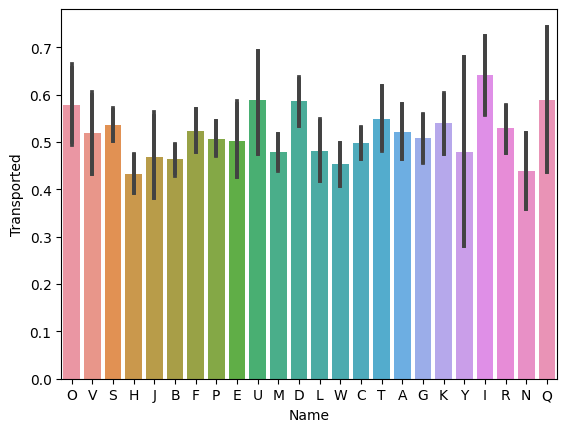

In [79]:
sns.barplot(Initial, train.Transported)
plt.show()

**Obsersvations**
* Transported rates seem to fluctuate around 0.5, last name doesn't seem to be an influential factor

**Decision**
* Drop Name column

In [80]:
# Deck_val = spending_by_deck_side.index.get_level_values('Deck').values
# Side_val = spending_by_deck_side.index.get_level_values('Side').values

# deck_side_frame = spending_by_deck_side.index.to_frame(index = False)
# deck_side_frame = pd.concat([deck_side_frame, spending_by_deck_side], axis = 1)
# deck_side_frame


In [86]:
# * How do transported rates differ by the first digit of travel groups
travel_group = train.PassengerId.str.extract(r"^(\d{4,4})", expand = False)
travel_group.value_counts()

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: PassengerId, Length: 6217, dtype: int64

In [ ]:
travel_group = train.PassengerId.str.extract(r"^(\d?)", expand = False)
travel_group.value_counts()

C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


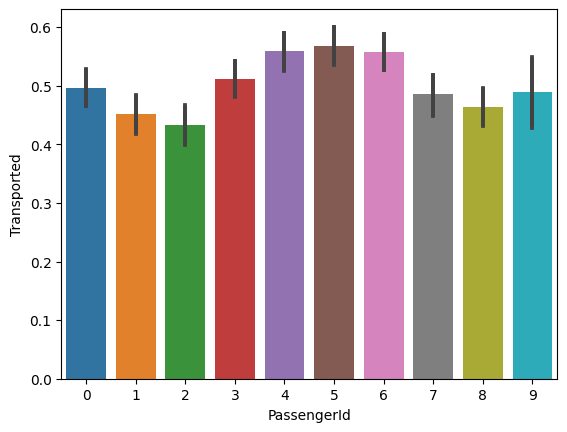

In [85]:
sns.barplot(travel_group, train.Transported); plt.show()

**Observation**:
* Too many travels groups construct succinct categories
* Transported rates seem not to be an influential factor since the rates are roughly the same across groups

**Decision**
* Exclude last name and last initial from consideration

In [87]:
# Test the number with each travel group
ingroup_num = train.PassengerId.str.extract(r"(\d+)$", expand = False)
ingroup_num.value_counts()

01    6217
02    1412
03     571
04     231
05     128
06      75
07      46
08      13
Name: PassengerId, dtype: int64

C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


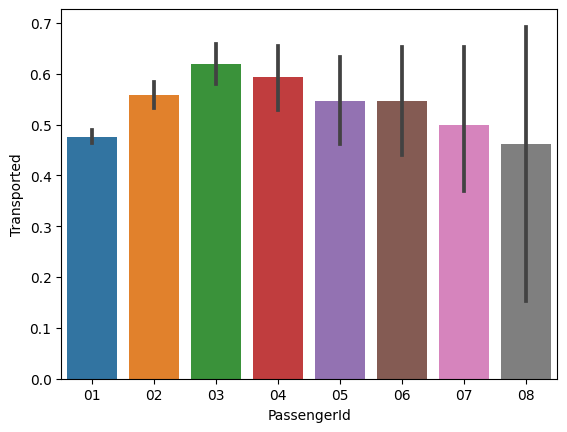

In [89]:
sns.barplot(ingroup_num, train.Transported); plt.show(); plt.show()

In [96]:
# Collapse rare in-group numbers with 03
# ingroup_short = ingroup_num.map(lambda x: '03' if x in ['04', '05', '06', '07', '08']) 
# ingroup_short

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689    False
8690    False
8691    False
8692    False
Name: PassengerId, Length: 8693, dtype: bool

**Observations**
* Across in-group numbers, the transported rates are roughly the same: 0.5
* Even if we collapse numbers larger than 03 with 03 and calculate the transportation again, the rates should be roughly 50%

**Decision**
* Drop PassengerId out of consideration.